In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('diabetes.csv')

In [5]:
data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploratiry Data Analysis

1. Feature Selection

In [8]:
data.shape

(768, 9)

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

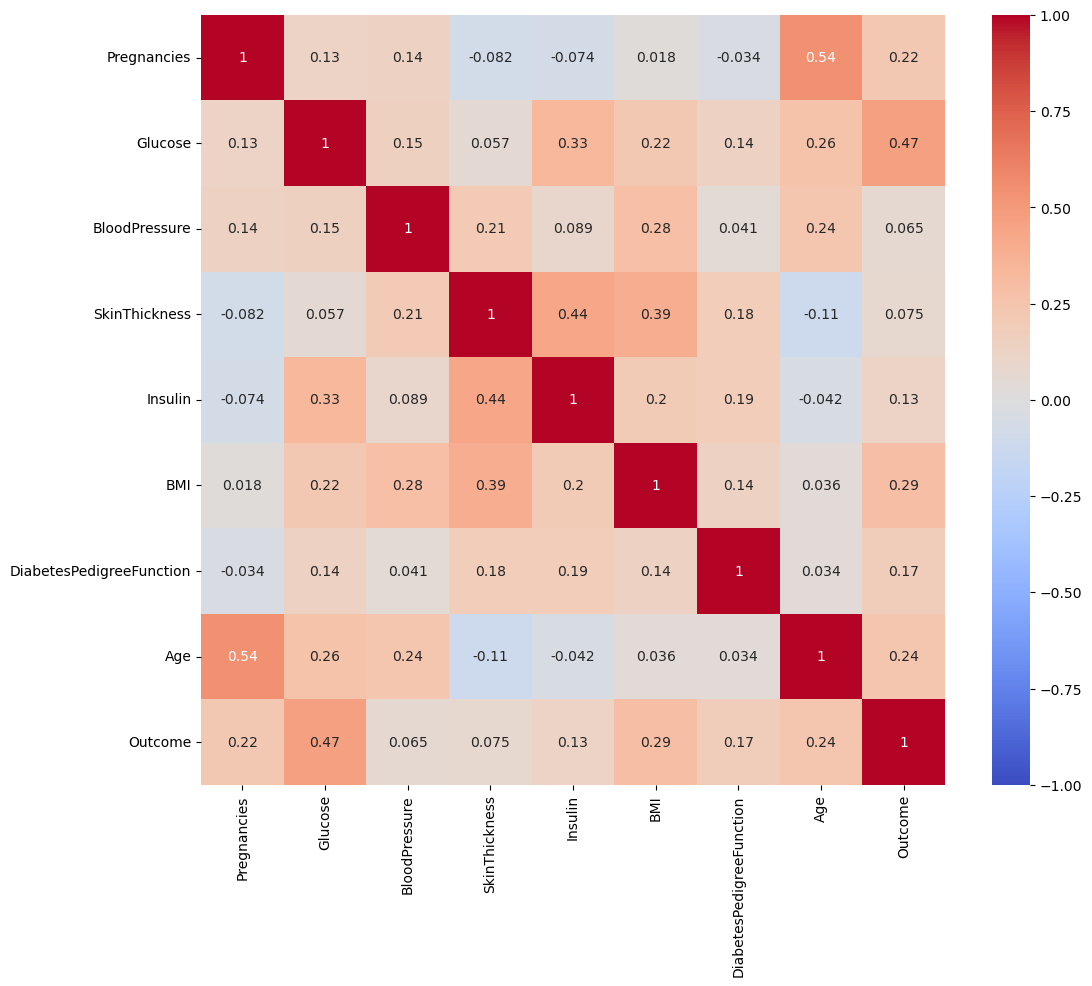

In [14]:
# visualization of correlation
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [9]:
# After visualization of correlation heatmap ,we can say their are no good correlation between any features.

# Descriptive Statistics

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pragnencies column analysis

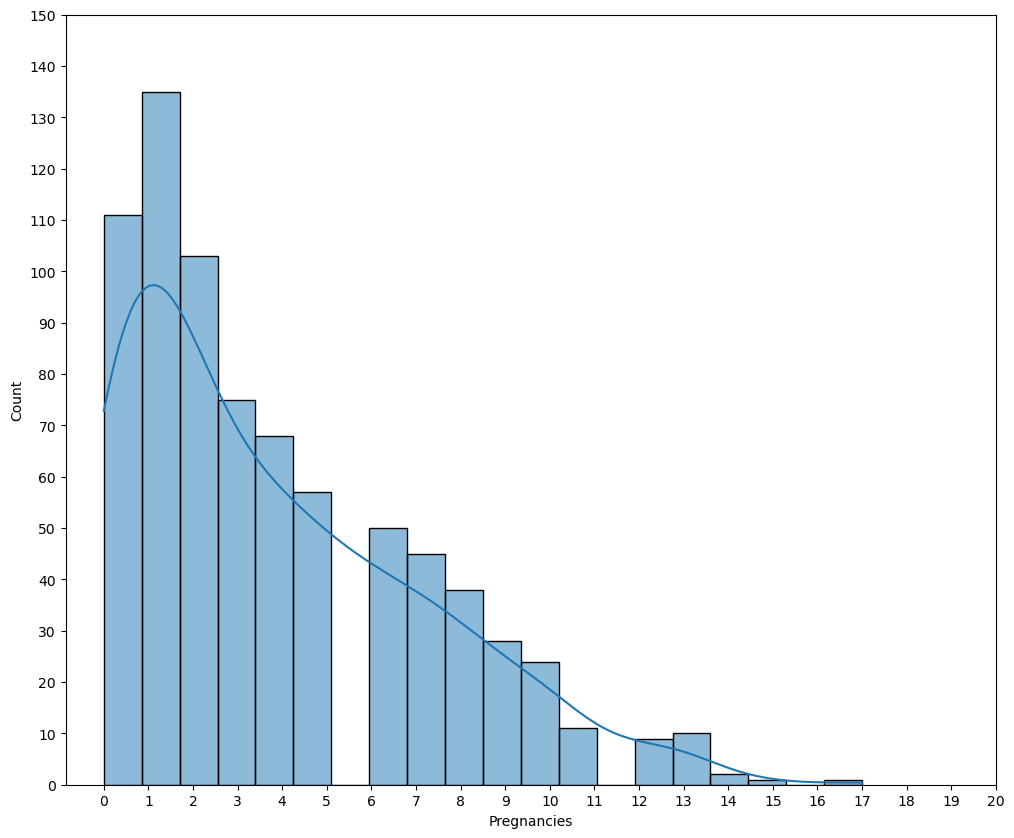

In [27]:
plt.figure(figsize=(12,10))
sns.histplot(data['Pregnancies'],bins=20,kde=True)
plt.xticks(range(0,21))
plt.yticks(range(0,151,10))
plt.show()

In [30]:
# non symmetric distribution
#here we need to remove skewness because it reduce our model(logistic regression,linear regression,knn,svm)performance
data['Pregnancies'].skew()
#moderate right skewed

np.float64(0.9016739791518588)

In [29]:
# check correlation with outcome
data.corr()['Pregnancies']['Outcome']

np.float64(0.22189815303398636)

Glucose

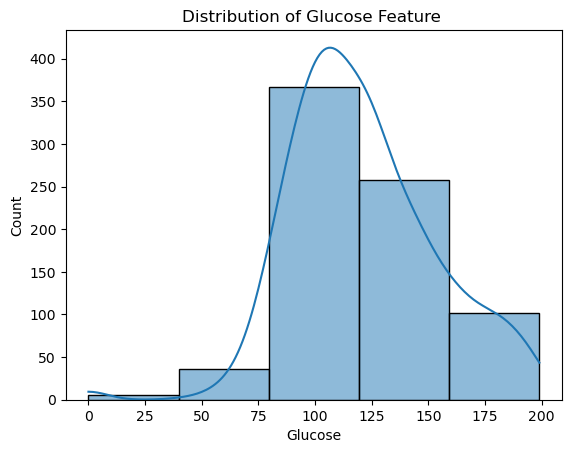

In [31]:
sns.histplot(data['Glucose'],bins=5,kde=True)
plt.title("Distribution of Glucose Feature ")
plt.show()

In [32]:
#fairly skewness
data['Glucose'].skew()
#fairly skewed

np.float64(0.17375350179188992)

BloodPressure

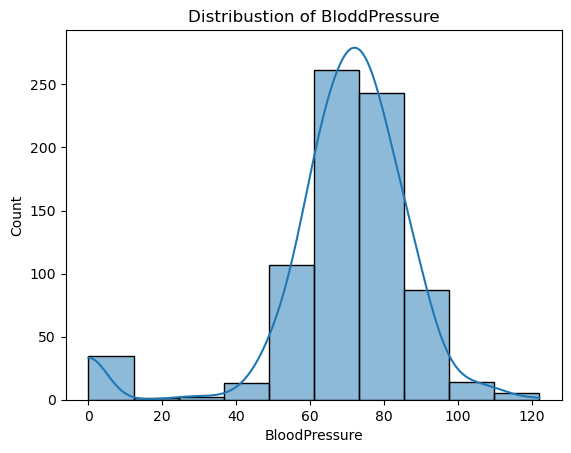

In [33]:
sns.histplot(data['BloodPressure'],kde=True,bins=10)
plt.title('Distribustion of BloddPressure')
plt.show()

In [34]:
data['BloodPressure'].skew()
#highly left skewed 

np.float64(-1.8436079833551302)

SkinThickness

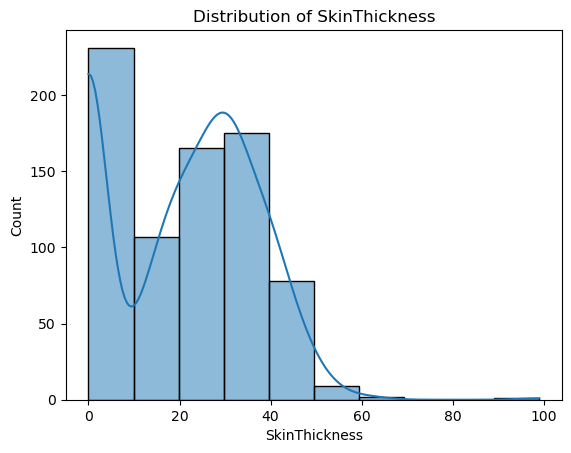

In [35]:
sns.histplot(data['SkinThickness'],bins=10,kde=True)
plt.title('Distribution of SkinThickness')
plt.show()

In [36]:
data['SkinThickness'].skew()
#fairly symmetrical

np.float64(0.10937249648187608)

Insulin

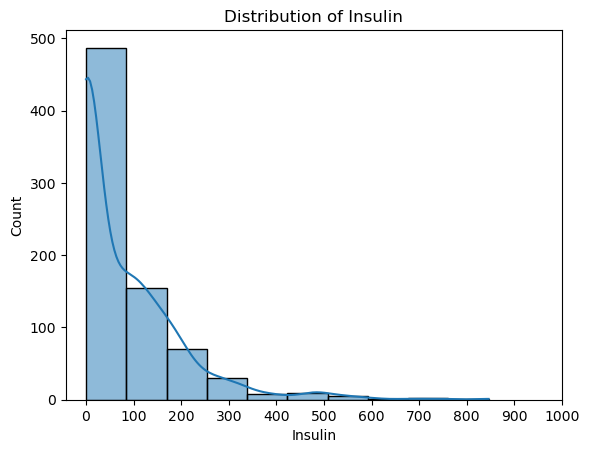

In [37]:
sns.histplot(data['Insulin'],kde=True,bins=10)
plt.title('Distribution of Insulin')
plt.xticks(range(0,1001,100))
plt.show()

In [38]:
# shewness
data['Insulin'].skew()
#highly  right skewness

np.float64(2.272250858431574)

BMI

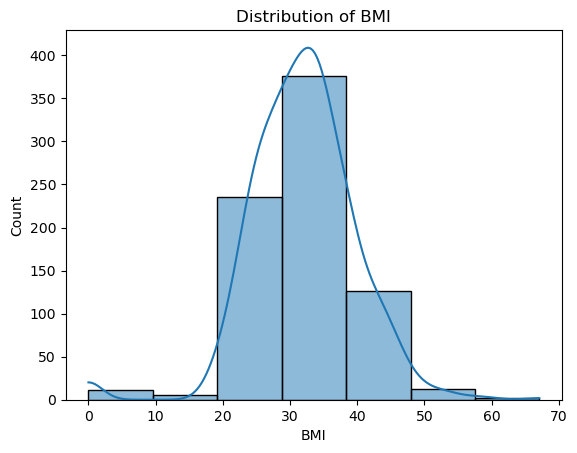

In [39]:
sns.histplot(data['BMI'],kde=True,bins=7)
plt.xticks(range(0,71,10))
plt.title('Distribution of BMI')
plt.show()

In [40]:
# skewness of BMI
data['BMI'].skew()
#fairly left skewed

np.float64(-0.42898158845356543)

DiabetesPedigreeFunction

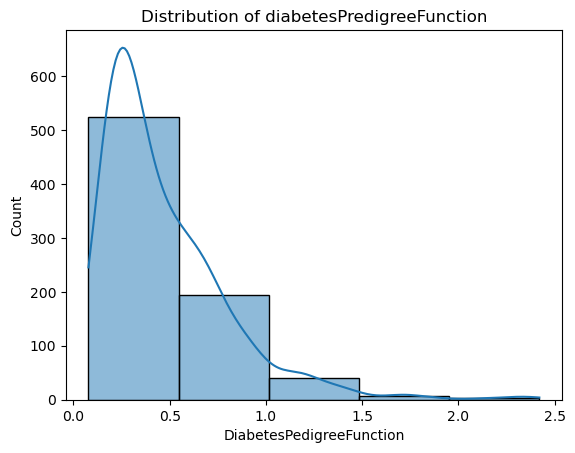

In [42]:
sns.histplot(data['DiabetesPedigreeFunction'],kde=True,bins=5)
plt.xticks(np.arange(0,2.6,0.5))
plt.title('Distribution of diabetesPredigreeFunction')
plt.show()

In [44]:
#skewness 
data['DiabetesPedigreeFunction'].skew()
#highly right skewned

np.float64(1.919911066307204)

Age

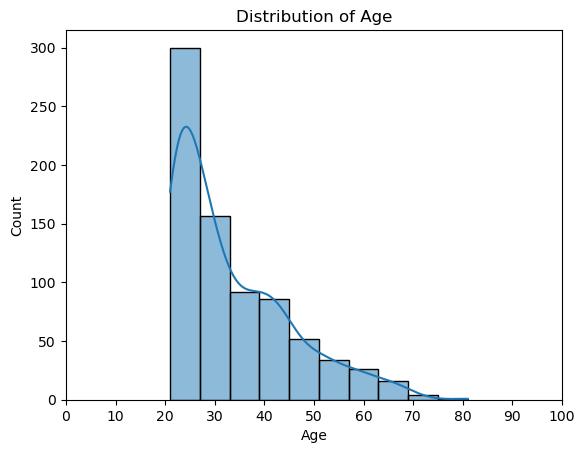

In [47]:
sns.histplot(data['Age'],kde=True,bins=10)
plt.title('Distribution of Age')
plt.xticks(range(0,101,10))
plt.show()

In [48]:
# skewness of age
data['Age'].skew()
# highly right skewed

np.float64(1.1295967011444805)

### Skewness Transformation using yeo-johnson method

In [56]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
data[['Pregnancies','BloodPressure','Insulin','DiabetesPedigreeFunction',"Age"]]= pt.fit_transform(data[['Pregnancies','BloodPressure','Insulin','DiabetesPedigreeFunction',"Age"]])

In [61]:
for i in data.columns:
    print(i,":",data[i].skew())



Pregnancies : -0.0014074531809070406
Glucose : 0.17375350179188992
BloodPressure : 0.08144356660369657
SkinThickness : 0.10937249648187608
Insulin : 0.041418055248568314
BMI : -0.42898158845356543
DiabetesPedigreeFunction : 0.01359231561371746
Age : 0.03284789327862446
Outcome : 0.635016643444986


In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Outlier Detection

In [23]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [62]:
#spliting data into input features (X)and output features (Y)
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome']

In [63]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.809586,148,0.007892,35,-1.009747,33.6,0.835162,1.326990
1,-0.837811,85,-0.364455,29,-1.009747,26.6,-0.127167,0.180513
2,1.196462,183,-0.479737,0,-1.009747,23.3,0.940692,0.282002
3,-0.837811,89,-0.364455,23,0.866120,28.1,-1.334266,-1.550826
4,-1.582024,137,-1.603357,35,1.074229,43.1,2.193934,0.375934


In [64]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

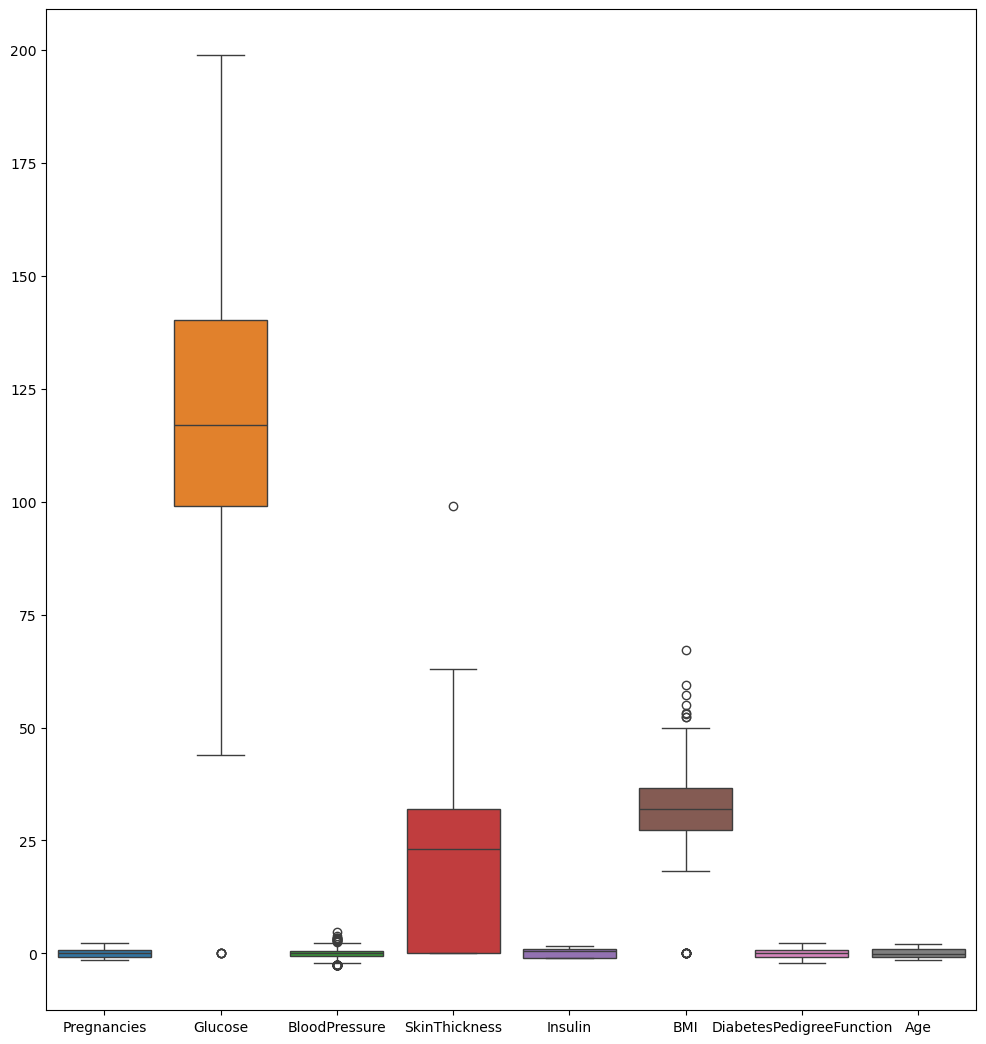

In [65]:
#,i am using boxPlot for visualization of outleirs
fig, ax=plt.subplots(figsize=(12,13))
sns.boxplot(data=X,ax=ax)
plt.show()

In [71]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.809586,148,0.007892,35,-1.009747,33.6,0.835162,1.326990
1,-0.837811,85,-0.364455,29,-1.009747,26.6,-0.127167,0.180513
2,1.196462,183,-0.479737,0,-1.009747,23.3,0.940692,0.282002
3,-0.837811,89,-0.364455,23,0.866120,28.1,-1.334266,-1.550826
4,-1.582024,137,-1.603357,35,1.074229,43.1,2.193934,0.375934
...,...,...,...,...,...,...,...,...
763,1.519839,101,0.280958,48,1.098660,32.9,-1.300114,1.676566
764,-0.352509,122,-0.121035,27,-1.009747,36.8,-0.182219,-0.324062
765,0.582020,121,0.007892,23,0.929373,26.2,-0.739727,0.070409
766,-0.837811,126,-0.698866,0,-1.009747,30.1,-0.137046,1.215384


In [72]:
# define outliers boundaries using IQR method
for i in X.columns:
    Q1=X[i].quantile(0.25)
    Q3=X[i].quantile(0.75)
    IQR=Q3-Q1
    upper_whisker=Q3+1.5*IQR
    lower_whisker=Q1-1.5*IQR
    mask=(X[i]>=lower_whisker)&(X[i]<=upper_whisker)
    

In [73]:
X[mask]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.809586,148,0.007892,35,-1.009747,33.6,0.835162,1.326990
1,-0.837811,85,-0.364455,29,-1.009747,26.6,-0.127167,0.180513
2,1.196462,183,-0.479737,0,-1.009747,23.3,0.940692,0.282002
3,-0.837811,89,-0.364455,23,0.866120,28.1,-1.334266,-1.550826
4,-1.582024,137,-1.603357,35,1.074229,43.1,2.193934,0.375934
...,...,...,...,...,...,...,...,...
763,1.519839,101,0.280958,48,1.098660,32.9,-1.300114,1.676566
764,-0.352509,122,-0.121035,27,-1.009747,36.8,-0.182219,-0.324062
765,0.582020,121,0.007892,23,0.929373,26.2,-0.739727,0.070409
766,-0.837811,126,-0.698866,0,-1.009747,30.1,-0.137046,1.215384


In [74]:
Y[mask].shape

(768,)

In [75]:
# filter dataset  after removing outliers
X_filter=X[mask]
Y_filter=Y[mask]

### Standardization

In [76]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_scaled=std.fit_transform(X_filter)

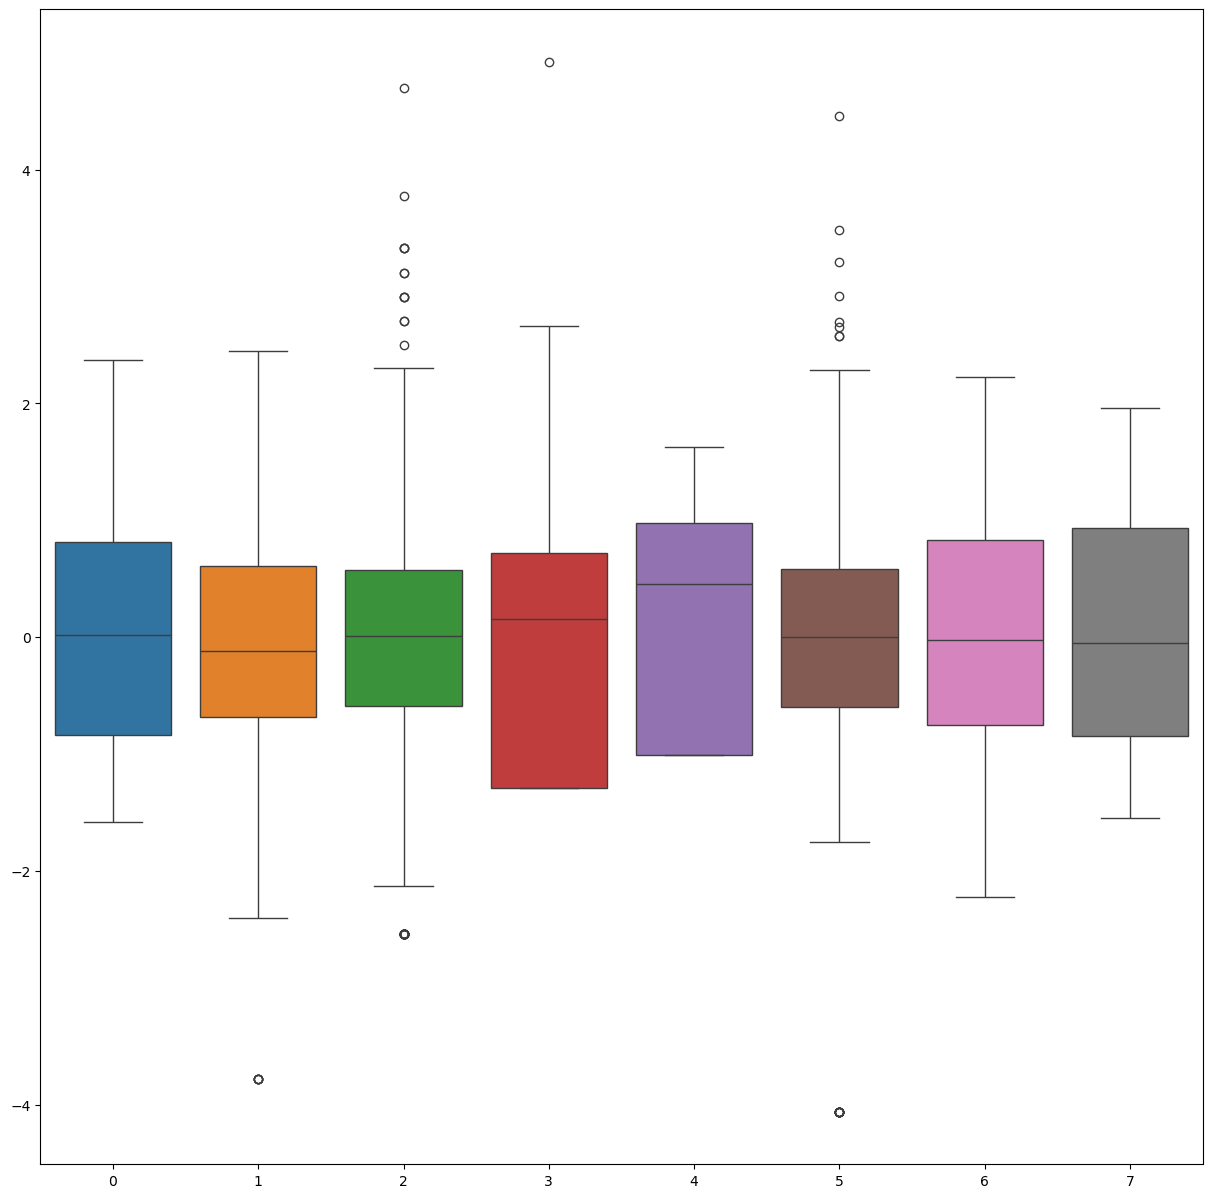

In [77]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scaled,ax=ax)
plt.show()

### Using quantile approach

In [81]:
X_scaled

array([[ 0.80958574,  0.84832379,  0.00789245, ...,  0.20401277,
         0.83516165,  1.32699047],
       [-0.83781126, -1.12339636, -0.36445481, ..., -0.68442195,
        -0.1271667 ,  0.1805129 ],
       [ 1.19646227,  1.94372388, -0.47973714, ..., -1.10325546,
         0.9406925 ,  0.28200208],
       ...,
       [ 0.58202026,  0.00330087,  0.00789245, ..., -0.73518964,
        -0.73972724,  0.07040885],
       [-0.83781126,  0.1597866 , -0.69886623, ..., -0.24020459,
        -0.13704599,  1.21538414],
       [-0.83781126, -0.8730192 , -0.1210346 , ..., -0.20212881,
        -0.31409947, -1.05598214]])

In [78]:
if isinstance(Y_filter, pd.DataFrame):
    print("yes")
else:
    print("NO")

NO


In [79]:
if isinstance(X_scaled,pd.DataFrame):
    print("Yes")
else:
    print("No")

No


In [82]:
# converting both X,Y into pd DataFrame form
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X_scaled=pd.DataFrame(data=X_scaled,columns=cols)
X_scaled.head()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.809586,0.848324,0.007892,0.907270,-1.009747,0.204013,0.835162,1.326990
1,-0.837811,-1.123396,-0.364455,0.530902,-1.009747,-0.684422,-0.127167,0.180513
2,1.196462,1.943724,-0.479737,-1.288212,-1.009747,-1.103255,0.940692,0.282002
3,-0.837811,-0.998208,-0.364455,0.154533,0.866120,-0.494043,-1.334266,-1.550826
4,-1.582024,0.504055,-1.603357,0.907270,1.074229,1.409746,2.193934,0.375934


In [83]:
Y_filter.shape

(768,)

1. Reseting index

In [84]:
X_scaled.reset_index(drop=True, inplace=True)
Y_filter.reset_index(drop=True,inplace=True)

In [85]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.809586,0.848324,0.007892,0.907270,-1.009747,0.204013,0.835162,1.326990
1,-0.837811,-1.123396,-0.364455,0.530902,-1.009747,-0.684422,-0.127167,0.180513
2,1.196462,1.943724,-0.479737,-1.288212,-1.009747,-1.103255,0.940692,0.282002
3,-0.837811,-0.998208,-0.364455,0.154533,0.866120,-0.494043,-1.334266,-1.550826
4,-1.582024,0.504055,-1.603357,0.907270,1.074229,1.409746,2.193934,0.375934
...,...,...,...,...,...,...,...,...
763,1.519839,-0.622642,0.280958,1.722735,1.098660,0.115169,-1.300114,1.676566
764,-0.352509,0.034598,-0.121035,0.405445,-1.009747,0.610154,-0.182219,-0.324062
765,0.582020,0.003301,0.007892,0.154533,0.929373,-0.735190,-0.739727,0.070409
766,-0.837811,0.159787,-0.698866,-1.288212,-1.009747,-0.240205,-0.137046,1.215384


2.quantile based filtering 

In [86]:
# applying 99% quantile in all features
mask=(X_scaled<X_scaled.quantile(0.99)).all(axis=1)
X_filtered=X_scaled[mask]
Y_filtered=Y_filter[mask]

In [87]:
X_filtered.shape

(705, 8)

3.Visualizing with boxplot

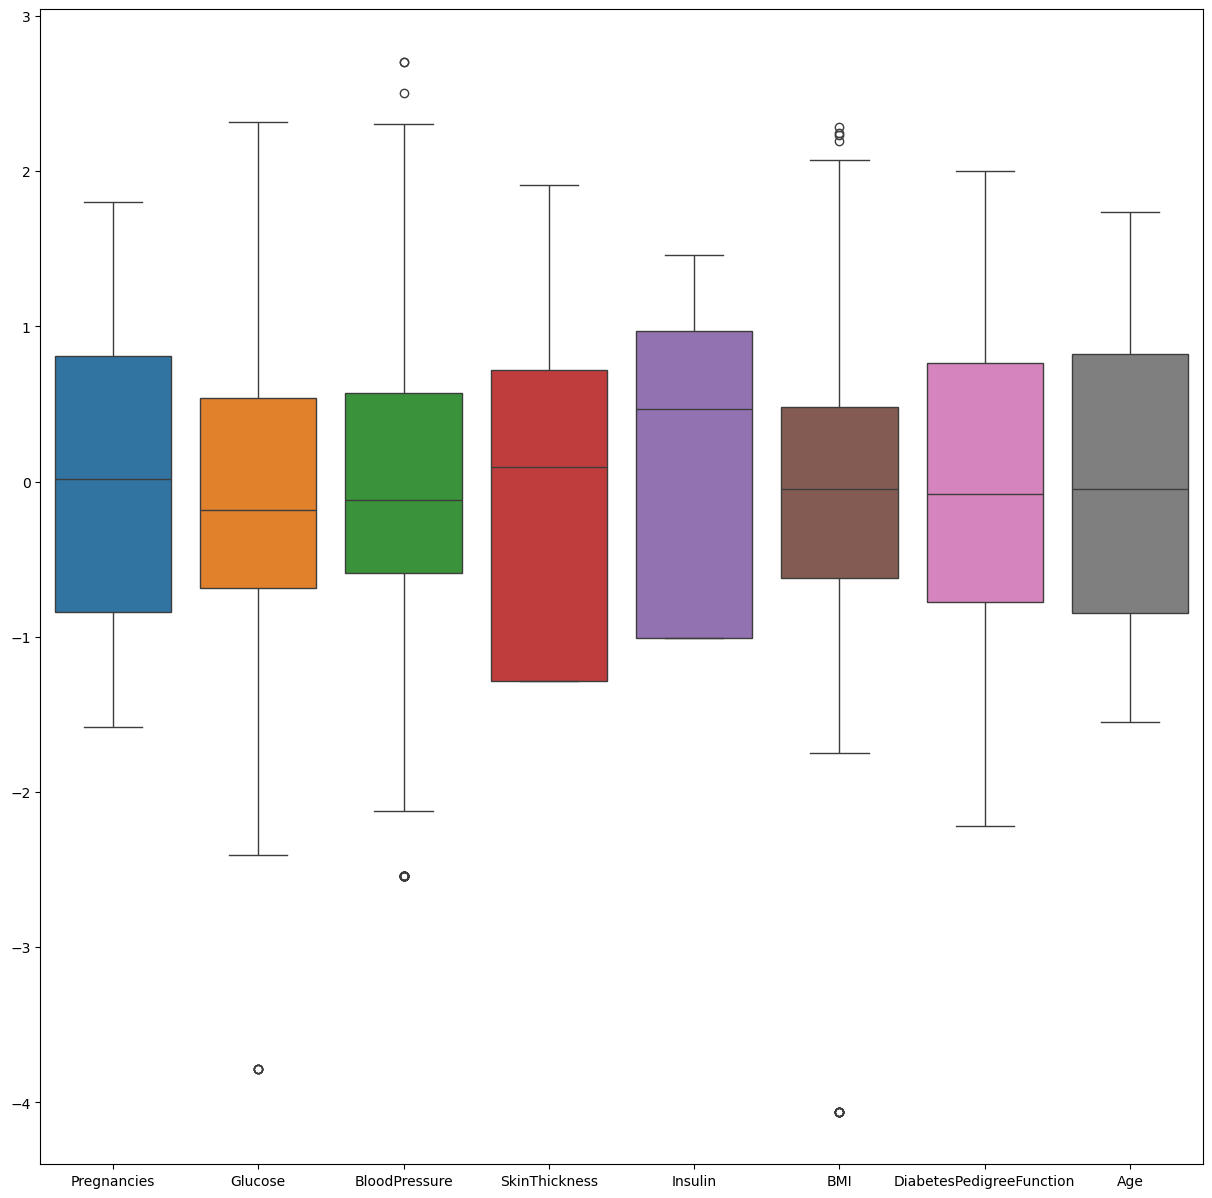

In [88]:
fig, ax=plt.subplots(figsize=(15,15))
sns.boxplot(X_filtered,ax=ax)
plt.show()

### Model training ,spliting of data and handling 

1.spliting the data training and testingset


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_filtered,Y_filtered,random_state=24,test_size=0.2)

In [91]:
X_train.shape

(564, 8)

In [92]:
X_test.shape

(141, 8)

2. Handling imbalanced data

In [95]:
Y_train.value_counts()

Outcome
0    382
1    182
Name: count, dtype: int64

In [96]:
#oversampling with SMOTE
#synthetic minority over_sampling Technique
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=24)
X_train,Y_train=smt.fit_resample(X_train,Y_train)

In [97]:
Y_train.value_counts()

Outcome
0    382
1    382
Name: count, dtype: int64

In [98]:
#model training
from sklearn.linear_model import LogisticRegression
logistic_regression_model=LogisticRegression()
logistic_regression_model.fit(X_train_resampled,Y_train_resampled)


LogisticRegression()

In [99]:
#model prediction
y_prediction=logistic_regression_model.predict(X_test)
print(y_prediction)

[0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0]


Model Evaluation

In [112]:
#model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(Y_test,y_prediction)
print(f"Accurecy score for diabetes diagnosis :",accuracy)

Accurecy score for diabetes diagnosis : 0.7446808510638298


In [102]:
# classification report

target_names = ['diabetic','Non-diabetic']

print(classification_report(Y_test, y_prediction, target_names=target_names))

              precision    recall  f1-score   support

    diabetic       0.84      0.74      0.79        90
Non-diabetic       0.62      0.75      0.68        51

    accuracy                           0.74       141
   macro avg       0.73      0.74      0.73       141
weighted avg       0.76      0.74      0.75       141



Use KNN Model

In [105]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [111]:
KNN_Predict_value=KNN_model.predict(X_test)
knn_model_accuracy=accuracy_score(Y_test,KNN_Predict_value)
print(f"KNN_Model_Accuracy_Score for diabetes diagnosis:",knn_model_accuracy)

KNN_Model_Accuracy_Score for diabetes diagnosis: 0.6950354609929078


In [61]:
#saving of our model 
import pickle
pickle.dump(logistic_regression_model,open('classification_model.pkl','wb'))

In [63]:
# loading our model and making prediction
classification_model=pickle.load(open('classification_model.pkl','rb'))

In [64]:
Y_pred=classification_model.predict(X_test)

In [65]:
Y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)